In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
#coordinates

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

tiksi ru
umzimvubu za
mahebourg mu
lavrentiya ru
taolanaro mg
lompoc us
portland au
erenhot cn
saskylakh ru
punta arenas cl
kralendijk an
ushuaia ar
komsomolskiy ru
batemans bay au
albany au
sao filipe cv
thinadhoo mv
nizamabad in
pimentel pe
mariestad se
qaanaaq gl
seoul kr
ushuaia ar
petropavlovsk-kamchatskiy ru
tshikapa cd
boali cf
arlit ne
geraldton ca
port alfred za
puerto ayora ec
dhidhdhoo mv
kapaa us
padang id
bathsheba bb
butaritari ki
calama cl
port macquarie au
cody us
albany au
mys shmidta ru
talnakh ru
new norfolk au
mehamn no
alyangula au
camocim br
humaita br
port alfred za
berezovyy ru
mastic beach us
taolanaro mg
taolanaro mg
gimli ca
geraldton au
albany au
busselton au
tumannyy ru
albany au
ostrovnoy ru
ixtapa mx
kavieng pg
barrow us
lebu cl
ushuaia ar
hobart au
rikitea pf
coihueco cl
yar-sale ru
longyearbyen sj
butaritari ki
east london za
puerto del rosario es
cherskiy ru
kachkanar ru
nizhneyansk ru
moron mn
arraial do cabo br
olafsvik is
rikitea pf
longyearbyen sj


ust-nera ru
kankavli in
vaini to
hermanus za
sinait ph
eureka us
hithadhoo mv
alice springs au
khorixas na
rebrikha ru
bredasdorp za
avarua ck
barrow us
albany au
tabiauea ki
yulara au
napier nz
hilo us
pontes e lacerda br
pangnirtung ca
yellowknife ca
oromocto ca
komsomolskiy ru
chokurdakh ru
broken arrow us
okha ru
dunedin nz
belushya guba ru
marcona pe
albany au
saint-philippe re
ushuaia ar
salekhard ru
illoqqortoormiut gl
arraial do cabo br
new norfolk au
nanortalik gl
tiksi ru
hilo us
ambulu id
nieuw amsterdam sr
rikitea pf
gustavo diaz ordaz mx
busselton au
yellowknife ca
barrow us
srednekolymsk ru
port blair in
andra ru
nelson bay au
belushya guba ru
mataura pf
yellowknife ca
cape town za
barrow us
bluff nz
alofi nu
bay roberts ca
the valley ai
kanniyakumari in
barrow us
anori br
ponta do sol cv
moranbah au
tambura sd
atuona pf
rikitea pf
yerbogachen ru
phangnga th
tuktoyaktuk ca
albany au
longyearbyen sj
ushuaia ar
trincomalee lk
amderma ru
yellowknife ca
zhigansk ru
jalu ly
ba

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

644

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 3 of Set 1 | mahebourg
Processing Record 4 of Set 1 | lavrentiya
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | lompoc
Processing Record 7 of Set 1 | portland
Processing Record 8 of Set 1 | erenhot
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | kralendijk
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | komsomolskiy
Processing Record 14 of Set 1 | batemans bay
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | sao filipe
Processing Record 17 of Set 1 | thinadhoo
Processing Record 18 of Set 1 | nizamabad
Processing Record 19 of Set 1 | pimentel
Processing Record 20 of Set 1 | mariestad
Processing Record 21 of Set 1 | qaanaaq
Processing Record

City not found. Skipping...
Processing Record 36 of Set 4 | saint-philippe
Processing Record 37 of Set 4 | lorengau
Processing Record 38 of Set 4 | maragogi
Processing Record 39 of Set 4 | namibe
Processing Record 40 of Set 4 | imbituba
Processing Record 41 of Set 4 | pailon
Processing Record 42 of Set 4 | port augusta
Processing Record 43 of Set 4 | bull savanna
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | havelock
Processing Record 46 of Set 4 | baranchinskiy
Processing Record 47 of Set 4 | boende
Processing Record 48 of Set 4 | codrington
Processing Record 49 of Set 4 | moranbah
Processing Record 50 of Set 4 | north platte
Processing Record 1 of Set 5 | champoton
Processing Record 2 of Set 5 | lensk
Processing Record 3 of Set 5 | roald
Processing Record 4 of Set 5 | troitsko-pechorsk
Processing Record 5 of Set 5 | tasiilaq
Processing Record 6 of Set 5 | harlingen
Processing Record 7 of Set 5 | panguna
Processing Record 8 of Set 5 | karaidel
Processing Rec

Processing Record 27 of Set 8 | sao joao da barra
Processing Record 28 of Set 8 | ust-nera
Processing Record 29 of Set 8 | kankavli
City not found. Skipping...
Processing Record 30 of Set 8 | sinait
Processing Record 31 of Set 8 | eureka
Processing Record 32 of Set 8 | alice springs
Processing Record 33 of Set 8 | khorixas
Processing Record 34 of Set 8 | rebrikha
Processing Record 35 of Set 8 | yulara
Processing Record 36 of Set 8 | napier
Processing Record 37 of Set 8 | pontes e lacerda
Processing Record 38 of Set 8 | oromocto
Processing Record 39 of Set 8 | chokurdakh
Processing Record 40 of Set 8 | broken arrow
Processing Record 41 of Set 8 | okha
Processing Record 42 of Set 8 | marcona
City not found. Skipping...
Processing Record 43 of Set 8 | salekhard
Processing Record 44 of Set 8 | nanortalik
Processing Record 45 of Set 8 | ambulu
Processing Record 46 of Set 8 | nieuw amsterdam
Processing Record 47 of Set 8 | gustavo diaz ordaz
Processing Record 48 of Set 8 | srednekolymsk
Proc

Processing Record 17 of Set 12 | mandera
Processing Record 18 of Set 12 | karakendzha
City not found. Skipping...
Processing Record 19 of Set 12 | new york
Processing Record 20 of Set 12 | scarborough
Processing Record 21 of Set 12 | khani
Processing Record 22 of Set 12 | pilani
Processing Record 23 of Set 12 | yithion
City not found. Skipping...
Processing Record 24 of Set 12 | pocoes
Processing Record 25 of Set 12 | kununurra
Processing Record 26 of Set 12 | kitgum
Processing Record 27 of Set 12 | riaba
City not found. Skipping...
Processing Record 28 of Set 12 | huarmey
Processing Record 29 of Set 12 | qandala
Processing Record 30 of Set 12 | raahe
Processing Record 31 of Set 12 | dudinka
Processing Record 32 of Set 12 | praia
Processing Record 33 of Set 12 | gao
Processing Record 34 of Set 12 | la palma
Processing Record 35 of Set 12 | linxia
Processing Record 36 of Set 12 | hanna
Processing Record 37 of Set 12 | kirovskiy
Processing Record 38 of Set 12 | siavonga
Processing Record

In [9]:
len(city_data)

592

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,-20.24,98,38,2.28,RU,2022-02-16 04:51:35
1,Mahebourg,-20.4081,57.7000,81.25,89,40,11.50,MU,2022-02-16 04:54:38
2,Lavrentiya,65.5833,-171.0000,-15.57,93,64,9.01,RU,2022-02-16 04:54:39
3,Lompoc,34.6391,-120.4579,54.09,78,0,18.99,US,2022-02-16 04:54:39
4,Portland,45.5234,-122.6762,47.89,85,100,8.99,US,2022-02-16 04:51:31
5,Erenhot,43.6475,111.9767,4.03,77,11,7.05,CN,2022-02-16 04:54:40
6,Saskylakh,71.9167,114.0833,-28.97,99,9,4.76,RU,2022-02-16 04:54:40
7,Punta Arenas,-53.1500,-70.9167,39.31,75,40,10.36,CL,2022-02-16 04:52:27
8,Kralendijk,12.1500,-68.2667,76.98,78,40,13.80,BQ,2022-02-16 04:54:41
9,Ushuaia,-54.8000,-68.3000,38.86,81,75,21.85,AR,2022-02-16 04:53:27


In [12]:
new_column_order=['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2022-02-16 04:51:35,71.6872,128.8694,-20.24,98,38,2.28
1,Mahebourg,MU,2022-02-16 04:54:38,-20.4081,57.7000,81.25,89,40,11.50
2,Lavrentiya,RU,2022-02-16 04:54:39,65.5833,-171.0000,-15.57,93,64,9.01
3,Lompoc,US,2022-02-16 04:54:39,34.6391,-120.4579,54.09,78,0,18.99
4,Portland,US,2022-02-16 04:51:31,45.5234,-122.6762,47.89,85,100,8.99
5,Erenhot,CN,2022-02-16 04:54:40,43.6475,111.9767,4.03,77,11,7.05
6,Saskylakh,RU,2022-02-16 04:54:40,71.9167,114.0833,-28.97,99,9,4.76
7,Punta Arenas,CL,2022-02-16 04:52:27,-53.1500,-70.9167,39.31,75,40,10.36
8,Kralendijk,BQ,2022-02-16 04:54:41,12.1500,-68.2667,76.98,78,40,13.80
9,Ushuaia,AR,2022-02-16 04:53:27,-54.8000,-68.3000,38.86,81,75,21.85


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

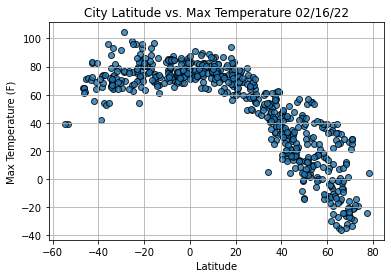

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

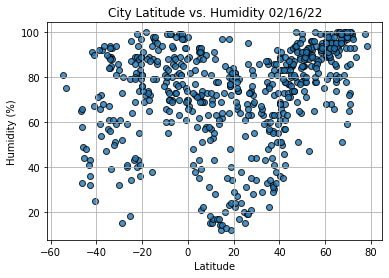

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

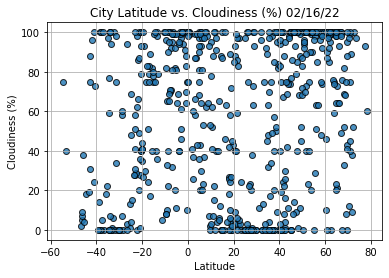

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

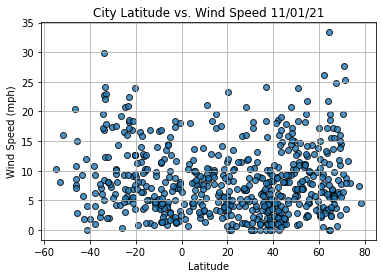

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2022-02-16 04:51:35,71.6872,128.8694,-20.24,98,38,2.28
2,Lavrentiya,RU,2022-02-16 04:54:39,65.5833,-171.0000,-15.57,93,64,9.01
3,Lompoc,US,2022-02-16 04:54:39,34.6391,-120.4579,54.09,78,0,18.99
4,Portland,US,2022-02-16 04:51:31,45.5234,-122.6762,47.89,85,100,8.99
5,Erenhot,CN,2022-02-16 04:54:40,43.6475,111.9767,4.03,77,11,7.05


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

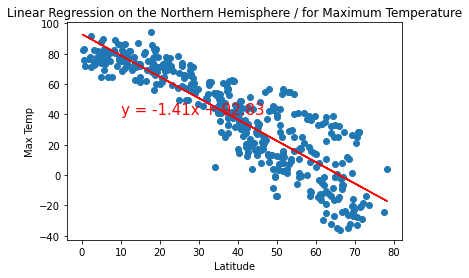

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere / for Maximum Temperature', 'Max Temp',(10,40))

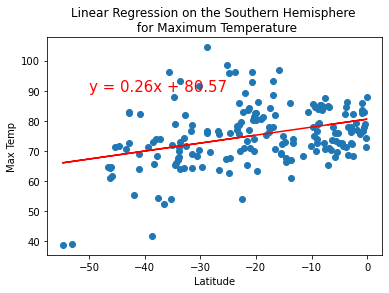

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

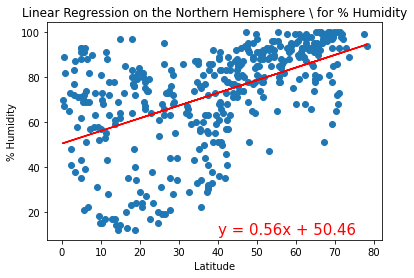

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(40,10))

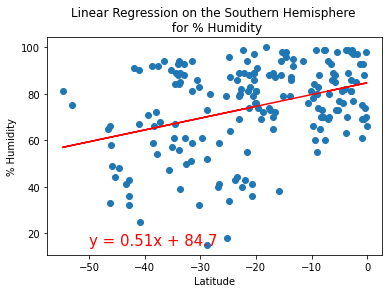

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

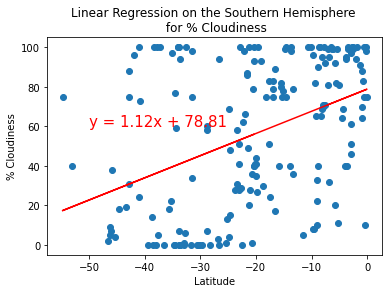

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

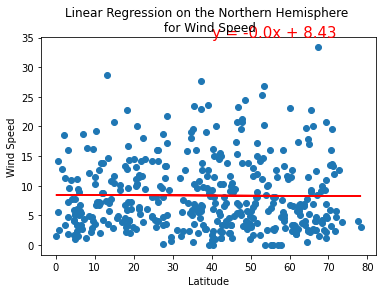

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

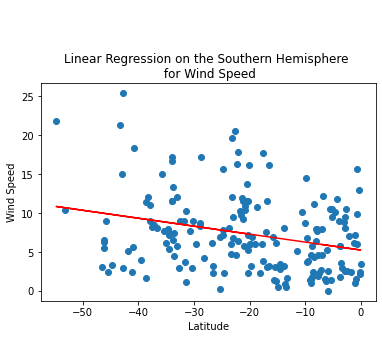

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))